# STUDENT DEPRESSION AND WELL-BEING : A DATA-DRIVEN ANALYSIS


#### Contact Information

Name - Sandeep Prajapat

Contact - +91-8502983497

Email - sandeep7773@yahoo.com

linkdin -http://www.linkedin.com/in/sandeep-kumar-prajapat

## Introduction


This analysis focuses on understanding the factors contributing to student depression by examining a dataset containing details on gender, age, academic pressure, study satisfaction, sleep patterns, dietary habits, financial stress, and family history of mental illness.

Dataset Summary


•	Source: Kaggle depression student dataset.
            dataset link - https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset
            
•	Key Variables: 

o	Gender, Age: Demographic factors.

o	Academic_Pressure, Study_Satisfaction: Indicators of academic well-being.

o	Sleep_Duration, Dietary_Habits: Lifestyle factors.

o	Financial_Stress, Family_History: Stress indicators.

o	Depression, Suicidal_Thoughts: Mental health outcomes.




setting up environment

In [107]:
import pandas as pd

Load the dataset

In [109]:
school_depression = pd.read_csv(r"C:\Users\sande\OneDrive\Desktop\depression_school_data.csv")

In [111]:
school_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Gender                                502 non-null    object
 1   Age                                   502 non-null    int64 
 2   Academic_pressure                     502 non-null    int64 
 3   Study_satisfaction                    502 non-null    int64 
 4   Sleep_duration                        502 non-null    object
 5   Dietary_habits                        502 non-null    object
 6   Have_you_ever_had_suicidal_thoughts?  502 non-null    object
 7   Study_hours                           502 non-null    int64 
 8   Financial_stress                      502 non-null    int64 
 9   Family_history_of_mental_illness      502 non-null    object
 10  Depression                            502 non-null    object
dtypes: int64(5), object(6)
memory us

In [113]:
school_depression.head()

,Gender,Age,Academic_pressure,Study_satisfaction,Sleep_duration,Dietary_habits,Have_you_ever_had_suicidal_thoughts?,Study_hours,Financial_stress,Family_history_of_mental_illness,Depression
0,Male,28,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1,3,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1,4,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1,5,More than 8 hours,Healthy,Yes,4,2,Yes,No


## Data Cleaning

Renamed columns for consistency

In [115]:
school_depression = school_depression.rename(columns={
    "Have_you_ever_had_suicidal_thoughts?": "Suicidal_Thoughts",
    "Family_history_of_mental_illness": "Family_History"})

In [117]:
bins = [17, 24, 30, 40]
labels = ['18-24', '25-30', '31-40']
school_depression['Age_Group'] = pd.cut(school_depression['Age'], bins=bins, labels=labels, right=False)

sleep_mapping = {
    "7-8 hours": 7.5,
    "5-6 hours": 5.5,
    "More than 8 hours": 8.5,
    "Less than 5 hours": 4.5
}
school_depression['Sleep_Hours'] = school_depression['Sleep_duration'].map(sleep_mapping)



In [119]:
school_depression.head()

,Gender,Age,Academic_pressure,Study_satisfaction,Sleep_duration,Dietary_habits,Suicidal_Thoughts,Study_hours,Financial_stress,Family_History,Depression,Age_Group,Sleep_Hours
0,Male,28,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No,25-30,7.5
1,Male,28,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No,25-30,5.5
2,Male,25,1,3,5-6 hours,Unhealthy,Yes,10,4,No,Yes,25-30,5.5
3,Male,23,1,4,More than 8 hours,Unhealthy,Yes,7,2,Yes,No,18-24,8.5
4,Female,31,1,5,More than 8 hours,Healthy,Yes,4,2,Yes,No,31-40,8.5


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

## Depression by Gender

In [125]:
sns.set(style="whitegrid", palette="muted")

<Figure size 800x500 with 0 Axes>

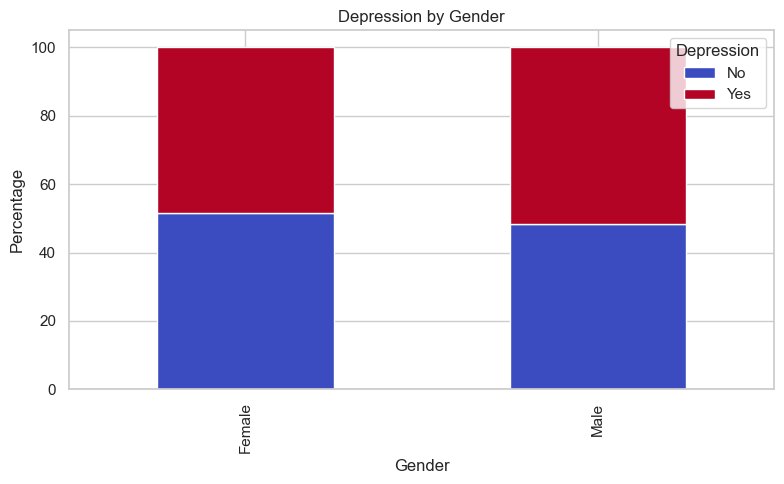

In [127]:
gender_depression = school_depression.groupby(['Gender', 'Depression']).size().unstack()
gender_depression_norm = gender_depression.div(gender_depression.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
gender_depression_norm.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 5))
plt.title("Depression by Gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.legend(title="Depression", loc="upper right")
plt.tight_layout()
plt.show()

## Academic Pressure vs Depression

<Figure size 800x500 with 0 Axes>

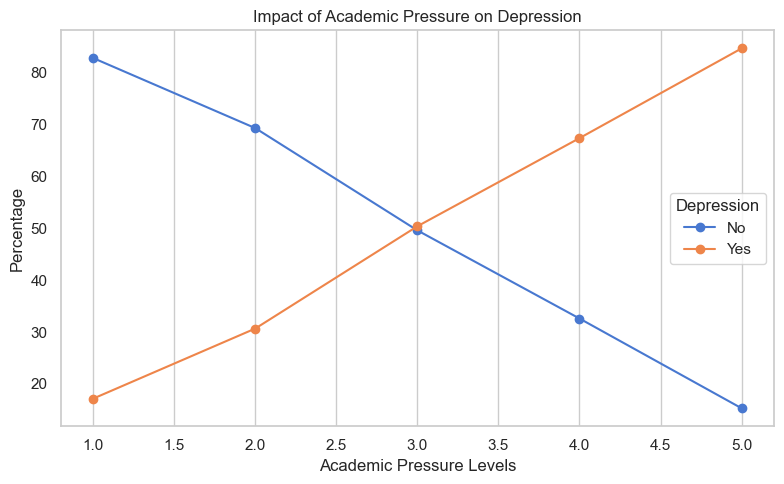

In [132]:
academic_pressure_depression = (
    school_depression.groupby(['Academic_ressure', 'Depression']).size().unstack()
)
academic_pressure_norm = academic_pressure_depression.div(
    academic_pressure_depression.sum(axis=1), axis=0
) * 100

plt.figure(figsize=(8, 5))
academic_pressure_norm.plot(kind='line', marker='o', figsize=(8, 5))
plt.title("Impact of Academic Pressure on Depression")
plt.ylabel("Percentage")
plt.xlabel("Academic Pressure Levels")
plt.legend(title="Depression")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## Study Satisfaction vs Depression

<Figure size 800x500 with 0 Axes>

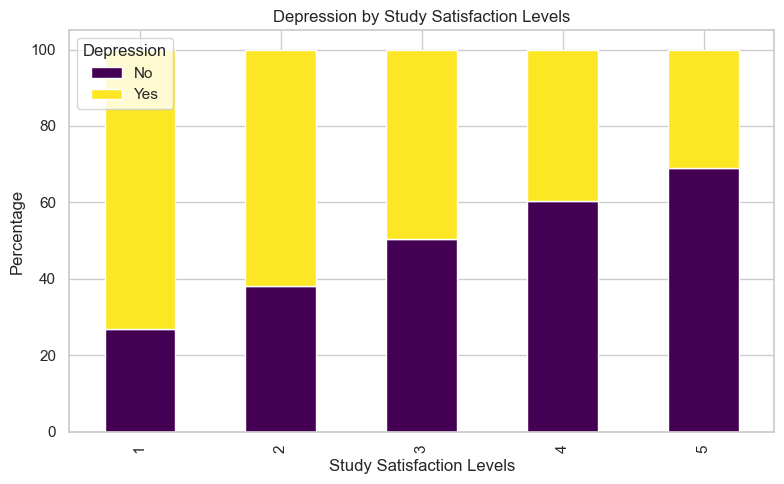

In [135]:
study_satisfaction_depression = (
    school_depression.groupby(['Study_satisfaction', 'Depression']).size().unstack()
)
study_satisfaction_norm = study_satisfaction_depression.div(
    study_satisfaction_depression.sum(axis=1), axis=0
) * 100

plt.figure(figsize=(8, 5))
study_satisfaction_norm.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title("Depression by Study Satisfaction Levels")
plt.ylabel("Percentage")
plt.xlabel("Study Satisfaction Levels")
plt.legend(title="Depression", loc="upper left")
plt.tight_layout()
plt.show()

## Depression vs Financial Stress

<Figure size 800x500 with 0 Axes>

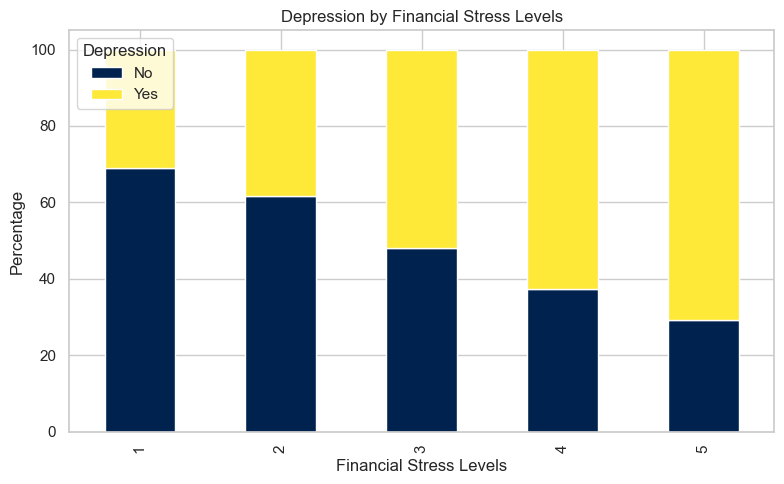

In [143]:
financial_stress_depression = (
    school_depression.groupby(['Financial_stress', 'Depression']).size().unstack()
)
financial_stress_norm = financial_stress_depression.div(
    financial_stress_depression.sum(axis=1), axis=0
) * 100

plt.figure(figsize=(8, 5))
financial_stress_norm.plot(kind='bar', stacked=True, colormap='cividis', figsize=(8, 5))
plt.title("Depression by Financial Stress Levels")
plt.ylabel("Percentage")
plt.xlabel("Financial Stress Levels")
plt.legend(title="Depression", loc="upper left")
plt.tight_layout()
plt.show()

## Dietary Habits vs Depression

<Figure size 800x500 with 0 Axes>

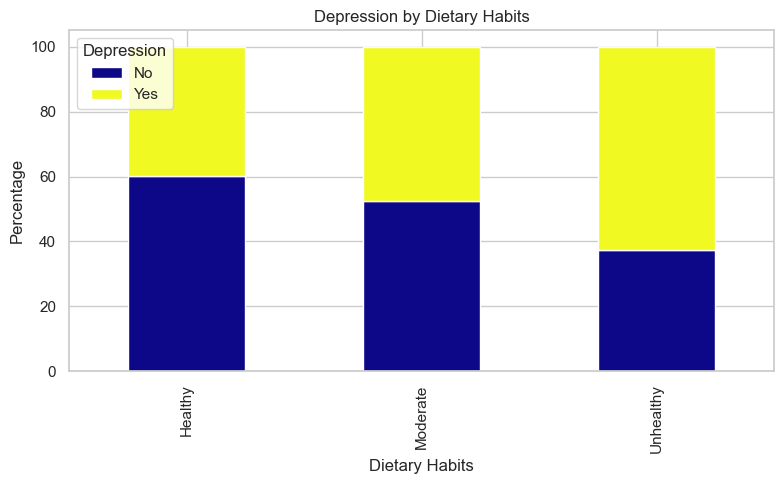

In [230]:
diet_depression = school_depression.groupby(['Dietary_habits', 'Depression']).size().unstack()
diet_norm = diet_depression.div(diet_depression.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
diet_sleep_norm.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8, 5))
plt.title("Depression by Dietary Habits")
plt.ylabel("Percentage")
plt.xlabel("Dietary Habits")
plt.legend(title="Depression", loc="upper left")
plt.tight_layout()
plt.show()

### Depression as per Age_Group

<Figure size 800x500 with 0 Axes>

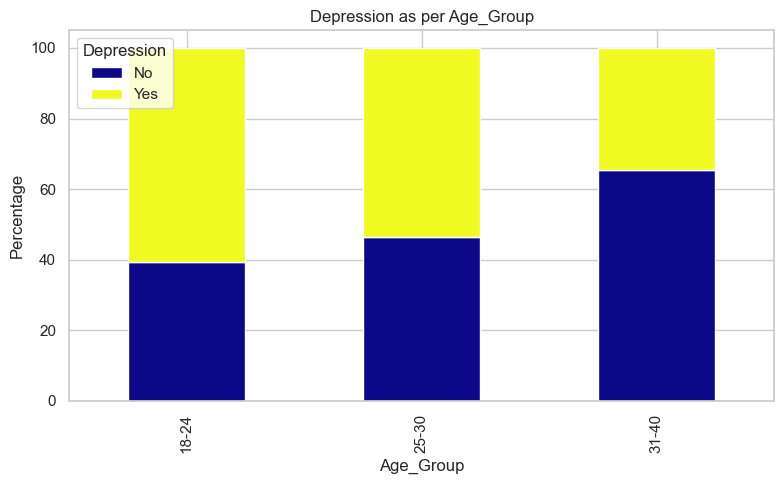

In [163]:
Age_Group_depression = school_depression.groupby(['Age_Group', 'Depression'], observed= False).size().unstack()
Age_Group_depression_norm = Age_Group_depression.div(Age_Group_depression.sum(axis=1), axis=0) * 100

# Visualization
plt.figure(figsize=(8, 5))
sleep_depression_norm.plot(kind='bar', stacked=True, colormap='plasma', figsize=(8, 5))
plt.title("Depression as per Age_Group")
plt.ylabel("Percentage")
plt.xlabel("Age_Group")
plt.legend(title="Depression", loc="upper left")
plt.tight_layout()
plt.show()

### Visual Summary


1. Depression by Gender:

    Males: 51.69%, Females: 48.51%.

2. Academic Pressure:

   Level 5: 84.69%, Level 1: 17.17%.

3. Study Satisfaction:

   Low Satisfaction: 73.26%, High Satisfaction: 30.93%.

4. Dietary Habits:

   Unhealthy: 62.72%, Healthy: 39.75%.

5. Age Group:

      18-24 : 60.73%,
   
      25-30 : 53.43%,
   
      31-40 : 34.67%


### Key Findings

1. Depression by Gender
 
	Males reported slightly higher depression rates (51.69%) compared to females (48.51%).
	
2. Impact of Academic Pressure

	Depression rates increased with academic pressure, peaking at 84.69% for students experiencing the highest level (Level 5).

3. Study Satisfaction

	Students with low satisfaction levels reported a depression rate of 73.26%, compared to 30.93% among those with high satisfaction.

4. Dietary Habits

	Students with unhealthy diets showed a depression rate of 62.72%, whereas those with healthy diets reported only 39.75%.

5. Financial Stress

	Depression likelihood increased significantly with financial stress.


### Get rid of dipression

Aim for 7-8 hours of sleep per night. Consistent sleep schedules help regulate mood and cognitive function.

Break down academic tasks into smaller, manageable goals to avoid feeling overwhelmed.

Regular physical exercise releases endorphins and reduces stress, which can significantly improve mood.

Stay connected with friends and family. Social support plays a critical role in mental health.

A healthy diet supports overall well-being and mood regulation. 

Practice relaxation techniques to manage stress effectively, such as deep breathing, meditation, or mindfulness.

If depression symptoms persist, seek professional help from a counselor or therapist.

### Support in dipression

#### Helplines

1. National Helpline for Mental Health:

   
    Mental Health Support Helpline (KIRAN):
    Phone: 1800-599-0019



3. Suicide Prevention Helplines:

   
    aasra helpline (For suicide prevention):
    Phone: 91-9820466726


   
5. Vandrevala Foundation:

   
    Phone: +91 9999 666 555

#### Online Therapy Platforms

1. YourDOST:

Website: www.yourdost.com 

Offers counseling and mental health support via chat, call, or video, connecting users to professional counselors and psychologists.


2. Therapify:

Website: https://therapifyindia.com

Offers online therapy sessions with certified counselors and psychologists.

#### NGO Support for Mental Health

1.The Live Love Laugh Foundation:

www.thelivelovelaughfoundation.org

 Focuses on creating awareness around mental health issues, providing support, and guiding individuals to the right resources.



2.Mental Health Foundation India (MHFI):

https://mhfi.in/ 

 A non-profit organization working for mental health awareness and providing help through various programs.

##### Reach out early: If you or someone you know is struggling with depression or mental health issues, it's essential to reach out for help at the earliest. Early intervention can prevent worsening symptoms.


##                                                                    Thank's For Watching